## BEEM011 - Written Assignment, Term 1 2025

##### Write all your R code and answers for each question in this Jupyter Notebook.  Additional files will not be considered when marking.

##### Include your candidate number in a comment at the top of your code in Q1
##### Do not put your name anywhere in the assignment or filename
##### Upload your Jupyter Notebook file and a matching PDF copy as a backup.


### Instructions

#### Summative assessment
Direction: This Assignment consists of 3 questions with multiple parts. There are 100 marks in total.  

Marks are given for evidence of best practice in R coding.

Unless otherwise stated you should use a 5% significance level for hypothesis tests.

Answer all the questions and upload 2 files to the ELE submission point:

1) Your Jupyter Notebook file (.ipynb) with all your code executed; 

2) a PDF copy of your Jupyter Notebook with all your code executed


In your Jupyter Notebook file, comment on each procedure to explain what you are doing (or intend to do). Submission is via ELE2 at https://ele.exeter.ac.uk/mod/coursework/view.php?id=3462086.
- Click on the link
- Upload your files (see above)
- Submit your work
Submission of an incorrect filetype will result in the loss or deduction of marks.

Read and answer each of the questions **using your own code and words**.  

Collaboration with others and plagiarism of other people's code are not permitted. Presenting someone else's code (including code or interpretations generated by AI) as your own work is **misrepresentation**, an academic conduct offence. Where AI is used to generate code and you copy and paste it, this should be acknowledged in your submission and the prompt used included as a comment.

The university's referencing guidelines apply. The referencing system used in the Business School is APA7. The library website provides details on how to correctly reference AI input and output used in your work: https://libguides.exeter.ac.uk/referencing/generativeai  



In the assignment you should not use packages outside of what we have learnt in class. If you use additional packages you must explain why, demonstrate your understanding of how they are functioning and justify why you needed this package.

We have covered the following packages in the libraries:

- readxl

- AER

- sandwich

- MASS

- margins

- stargazer

- plm

- ggplot2

- haven

- psych

Some people will also have used the following packages for installation:

- base

- devtool

## Question 1 [40 marks]

You are analyzing the determinants of savings using a dataset of demographic characteristics from randomly sampled individuals from the UK. The dataset includes the following variables:


- Savings: The total household savings (£), for example the balance in their savings account at the end of this year. 
- Previous savings: Household savings in the previous year (£)
- Income (continuous): The individual’s monthly income (in £).
- Industry (categorical): Main industry that the individual is employed in.
- Age (continuous): The individual’s age (in years).
- Gender (binary): A binary indicator equal to 1 if the individual's gender is male.
- Family (binary): A binary variable equal to 1 if the individual has children (under the age of 18)
- Pet (categorical): Category of main pet owned by the individual.
- Household_size: number of adults living in the property where the individual lives. 
- Year (continuous): The year wave that each observation relates to. The first wave, 1, relates to 2016. There are multple waves in the dataset.
- ID: An individual identifier for each person in the dataset.

You have been asked to investigate the factors affecting savings behaviour in the UK.

a) Consider the description of the variables included in the dataset but do not open the file yet. 

Write down an initial linear-linear model where savings is the dependent variable and explain how you decided which variables to include and in what form. [5 marks]

 **Student Number: 750095065** | **Canditate Number: 300362**

$$Savings_{it} = \alpha_i + \delta_t + \beta_1prevSavings_{it} + \beta_2 Income_{it} + \beta_3 Family_{it} + \beta_4 householdSize_{it} + \beta_5pet_{it} +\epsilon_{it}$$


**Reasoning**

This model is built to investigate the determinants of household savings. It utilises panel data methodology since the data is comprised of multiple time periods. The model uses fixed effects estimation to control for unobserved individual heterogeneity. 

I made the assumption that gender is time-invariant means that it will be obsorbed by the individual fixed effects. Including it would create a perfect multicolinearity, hence why it is dropped from the model. This same reasoning can be applied to industry. Assuming the industry someone stays in does not change over time, the regressor has no within-individual variation due to it being perfectly mutlicolinear with entity fixed effects, and so is dropped out of the model.

Age will increase over time, at the same rate as time, so it cannot be seperately identified from time and entity fixed effects, making it perfectly multi-colinear and therefore it should be dropped from the model.

Without opening the data we can assume that the other variables could have an effect on savings and may or may not change over time, so for now they are written as part of the model and arent taken to be part of the fixed effects. 

b) After reading some existing literature on savings behaviour, you decide to include nonlinear and interaction terms in your model. 

Write down an updated version of your model allowing income to have a nonlinear polynomial effect (up to cubic) and for income to interact with family and gender, such that the effect of income on savings can differ by family status and this effect differs by gender. [5 marks]

\begin{align*}
Savings_{it} &= \alpha_i + \delta_t + \beta_1 Savings_{it} + \beta_2 Income_{it} + \beta_3 Income_{it}^3 \\
&\quad + \beta_4 Income_{it}^2 + \beta_5 Family_{it} +  \\
&\quad + \beta_6 (Income_{it} \times Family_{it} \times Gender_{i}) \\
&\quad + \beta_7 (Income_{it} \times Family_{it}) + \beta_8 (Income_{it} \times Gender_{i}) \\
&\quad + \beta_{9} (Gender_{i} \times Family_{it}) + \epsilon_{it}
\end{align*}


**Brief explanation** 

The introduction of the non-linear terms and three way interctaction terms also have to include the lower order terms and double interaction effects. This avoids biased coefficients from omitted variable bias as the lower order and interaction terms will be correlated with other regressors in the model as well as having an effect on the dependent variable savings. 

c) What assumptions must hold for the OLS estimators to be the Best Linear Unbiased Estimators (BLUE) in your updated model from part (b)? [5 marks]

**BLUE Assumptions For The Updated Model**

**1.**

E(uit|Xi1,…,XiT,αi) = 0. The expected value of the error term uit at time t for individual i, conditional of all observations of all regressors across all time periods and individual fixed effects is 0.

**2.** 

(Xit, Yit) are independently,identically distributed. 

**3.** 

(Xit, Yit) have finite fourth moments. Meaning no extreme outliers in the data.

**4.** 

There is no perfect multicollinearity between regressors

d) What checks would you perform on your data prior to estimation to assess whether these assumptions hold in your updated model from part (b)? [5 marks]

**Pre-estimation checks**
    
 -We can plot a Scatter Plot and look for patterns and to check whether the relationship can be roughly captured by the defined models above.

 -We can check the data to see whether certain groups could be over or under-represented such as industry, gender, age. Futhermore we can check for systematic patterns by ID by plotting Savings against ID.

 -We can also plot a historgram to check for heavy tails, whcih can help to identify large outliers. 

 -Another option is that we can create a correlation matrix which can be used to check for multicolinearity between regressors

However, Since we have not performed an estimation, there are limitations to what checks can we perform. We cant check for actual exogenity without residuals. It is diffcult to provide conclusive evidence from any of these test outputs actually cause issues as they are just preliminary checks.

e) Explain the steps you would take to test whether the inclusion of these nonlinear and interaction terms improves the model fit compared to your initial model in part (a). [10 marks]

*To test whether or not the inclusion of non-linear and interaction terms improves model fit, we need to test whether the introduction of the non-linear terms has a statistically significant effect on savings*.

**1)** Define the Null Hypothesis

- The Null hypotheis (H₀) is that the coefficients on all non-linear terms are jointly equal to 0. This means that the non-linear terms do not provide an improved model fit.

- The alternative hypothesis(H₁) is that at least 1 non-linear term improves the model. This means that a non-linear term or terms improves the model fit. 

**2)** Define and estimate both models. 

- The unrestricted models includes the non-linear regressors and linear regressors,  the restricted model contains only the linear regressors. Both models include the FE to account for unobserved individual heterogeneity.

**3)** Define the significance level

- For this test the signifcance level will be defined as 5%.

- The decision criteria is to reject the null hypothesis (H₀) if p < 0.05, otherwise fail to reject the null hypothesis. 

**4)** Perform the f test

-Compute the restricted vs unrestricted f test using Pftest() for panel data, taking the inputs of the restricted and unrestricted models, ensuring clustered, hetroskedacticity consistent standard errors.

**5)** Interpret the result and reject or fail to reject based on the decision criteria.

- If we decide to reject H₀ (p < 0.05), there is statistically significant evidence that the non-linear terms provide a better model fit. This shows that the reduction in residual sum of squares is big enough relative to remaining model noise and the degrees of freedom to cause a meaningful effect in the variation of savings.

- If we fail to reject H₀ (p ≥ 0.05), there is not enough evidence at the 5% level to make the conclusion that the non-linear terms improve the model fit. Meaning that, the reduction in residual sum of squares is not large enough to justify the loss of degrees of freedom from adding additional regressors. 





Write your answer here [Max 300 words]

f) Explain the steps you would take to test whether the interaction between income, family status and gender is statistically significant at the 1% level. [10 marks]

*To test whether the three-way interaction between income, family status, and gender is statistically significant at the 1% level, I would conduct a hypothesis test on the interaction coefficient using a t-test.*

*I am specifically using a t-test to test the triple interaction only.*


**1)** The Null hypothesis (H₀) is that the interaction term's estimated coefficient, is equal to 0. Meaning that the three way interaction effect has no effect on savings, ceteris paribus.

The alternative hypothesis (H₁) is that the coefficient on the three way interaction effect is not zero, ceteris paribus This would mean the interaction has a statistically significant effect on savings. 

**2)** Define and estimate the regression model. 

- The full model includes the main effects, the two way interaction effects and the threeway interaction, as well as FE to control for unobserved individual heterogeneity.


**3)** Set the significance level to α = 0.01 (1% level) as per the question specification. 
- The decision rule is to reject H₀ if p < 0.01, otherwise fail to reject H₀. 

**4)** Compute the t test using the coeftest for panel data.
- This is done by inputing the specified model into coeftest, ensuring clustered, heteroskedacticity consistent standard errors.

**5)** Decision and interpretation

- If the p < 0.01 from the t test, we reject the null hypothesis (H₀). This means that there is a statistically significant evidence at the 1% level, showing that the coefficient of the three-way interaction effect has an effect on savings. 

- If p ≥ 0.01 then we fail to reject the null hypothesis (H₀), meaning there is insufficient evidence at the 1% level to make the conclusion that three way interaction term has a statistically significant effect on savings.



## Question 2 [25 marks]

a) Set the seed for randomisation to your candidate number. Then draw, at random, an integer (whole number) between 1 and 4 (inclusive) and print the result. [2 marks]

In [1]:
set.seed(300362)
#draw sample between 1 and 4 based on the seed
sample(1:4, 1)
#Output is 1 so I will be using the Panel Savings 1
1


[1] 1

[1] 1

In [2]:
#Load in libraries
library(stargazer)
library(AER)
library(ggplot2)
library(plm)
library(readxl)
library(psych)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Warning message:
"package 'plm' was built under R version 4.5.2"
Warning message:
"package 'psych' was built under R version 4.5.2"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


The following object is masked from 'package:car':

    logit




b) Load in the simulated panel savings dataset relating to the number you have selected. Store this as *mydata*.

For example if I selected number 5 I would need to load panel_savings_5.csv.

Report the total number of observations and time period covered by the data. [3 marks]

In [3]:
#Load the csv and store as mydata
mydata <- read.csv("panel_savings_1.csv")

#check if the dataset is balanced first
is.pbalanced(mydata)
#Number of individuals
cat("\nTotal number of individuals:",length(unique(mydata$id)))
#Time periods
cat("\nTotal time periods:",length(unique(mydata$year)))
#Number of Observations
cat("\nn = ", length(unique(mydata$year))*length(unique(mydata$id)))




[1] TRUE


Total number of individuals: 90
Total time periods: 6
n =  540

c) Taking account of your previous answers, prepare the data for analysis. [3 marks]

       id            year          age            income           gender      
 Min.   : 1.0   Min.   :1.0   Min.   :19.00   Min.   :  7129   Min.   :0.0000  
 1st Qu.:23.0   1st Qu.:2.0   1st Qu.:36.00   1st Qu.: 34554   1st Qu.:0.0000  
 Median :45.5   Median :3.5   Median :54.00   Median : 59895   Median :1.0000  
 Mean   :45.5   Mean   :3.5   Mean   :51.97   Mean   : 61715   Mean   :0.5889  
 3rd Qu.:68.0   3rd Qu.:5.0   3rd Qu.:69.00   3rd Qu.: 84147   3rd Qu.:1.0000  
 Max.   :90.0   Max.   :6.0   Max.   :85.00   Max.   :148495   Max.   :1.0000  
     family        prev_savings      savings          pet           
 Min.   :0.0000   Min.   :    0   Min.   :    0   Length:540        
 1st Qu.:0.0000   1st Qu.:16428   1st Qu.:22311   Class :character  
 Median :0.0000   Median :27507   Median :31554   Mode  :character  
 Mean   :0.3667   Mean   :27843   Mean   :32669                     
 3rd Qu.:1.0000   3rd Qu.:38577   3rd Qu.:42280                     
 Max.   :1.0000   Max.   :

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,540,4.550000e+01,2.600325e+01,45.50,4.550000e+01,33.3585,1.000,90.00,89.00,0.00000000,-1.2069557,1.119002e+00
year,2,540,3.500000e+00,1.709409e+00,3.50,3.500000e+00,2.2239,1.000,6.00,5.00,0.00000000,-1.2749782,7.356124e-02
age,3,540,5.196667e+01,1.916598e+01,54.00,5.213194e+01,24.4629,19.000,85.00,66.00,-0.09257161,-1.2712408,8.247724e-01
income,4,540,6.171503e+04,3.315858e+04,59895.19,5.953198e+04,37094.6882,7129.292,148495.43,141366.14,0.54889814,-0.3929932,1.426918e+03
gender,5,540,5.888889e-01,4.924916e-01,1.00,6.111111e-01,0.0000,0.000,1.00,1.00,-0.36030782,-1.8736377,2.119346e-02
family,6,540,3.666667e-01,4.823412e-01,0.00,3.333333e-01,0.0000,0.000,1.00,1.00,0.55183514,-1.6986133,2.075666e-02
prev_savings,7,540,2.784344e+04,1.803972e+04,27506.67,2.698781e+04,16442.8139,0.000,80958.47,80958.47,0.37169443,-0.1605019,7.763060e+02
savings,8,540,3.266858e+04,1.594595e+04,31553.58,3.208121e+04,14419.8495,0.000,80958.47,80958.47,0.40115883,0.5187021,6.862044e+02
pet*,9,540,3.433333e+00,1.667433e+00,3.00,3.425926e+00,2.9652,1.000,6.00,5.00,-0.01442808,-1.4382809,7.175491e-02


,id,year,age,income,gender,family,prev_savings,savings,pet,industry,household_size
,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,1,1,39,82915.09,1,1,6124.836,34207.27,Bird,Construction,3
2,1,2,40,84249.27,1,1,34207.273,34366.13,Bird,Construction,3
3,1,3,41,84537.81,1,1,34366.126,34399.54,Bird,Construction,3
4,1,4,42,83896.62,1,1,34399.544,34324.83,Bird,Construction,3
5,1,5,43,81939.76,1,0,34324.830,34086.64,Reptile,Construction,3
6,1,6,44,81514.25,1,0,34086.641,34032.82,Reptile,Construction,3


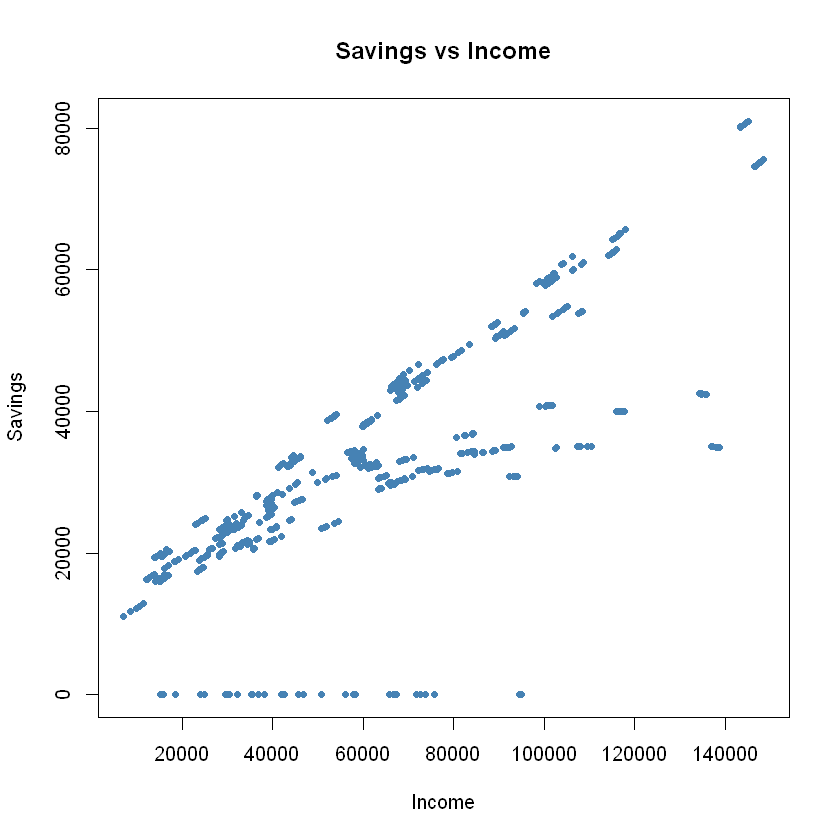

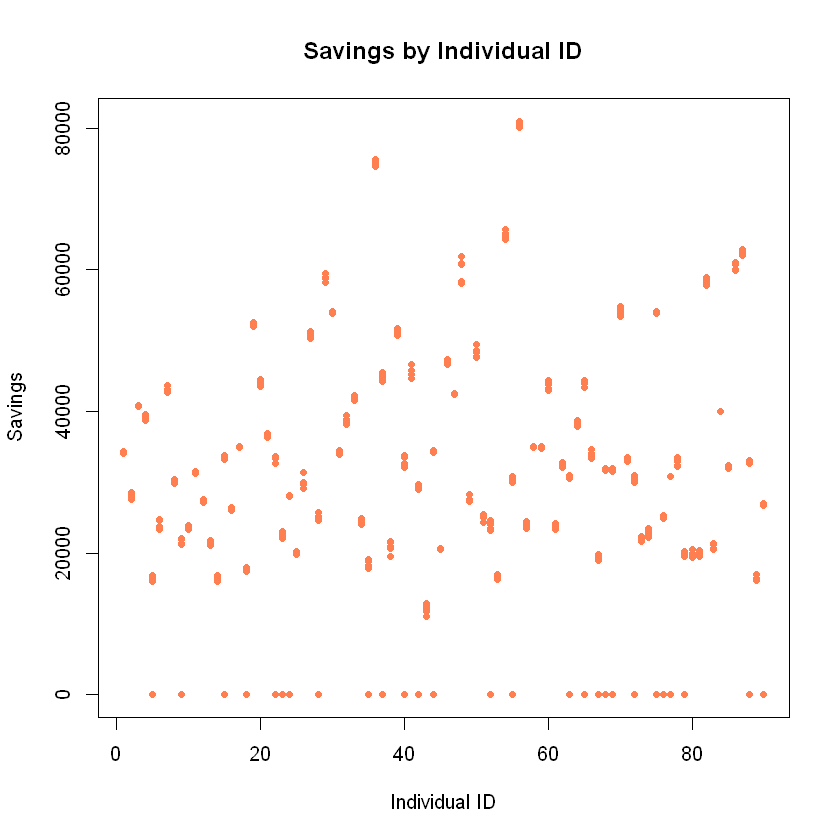

[1] "Bird"    "Cat"     "Dog"     "Fish"    "Reptile" "None"

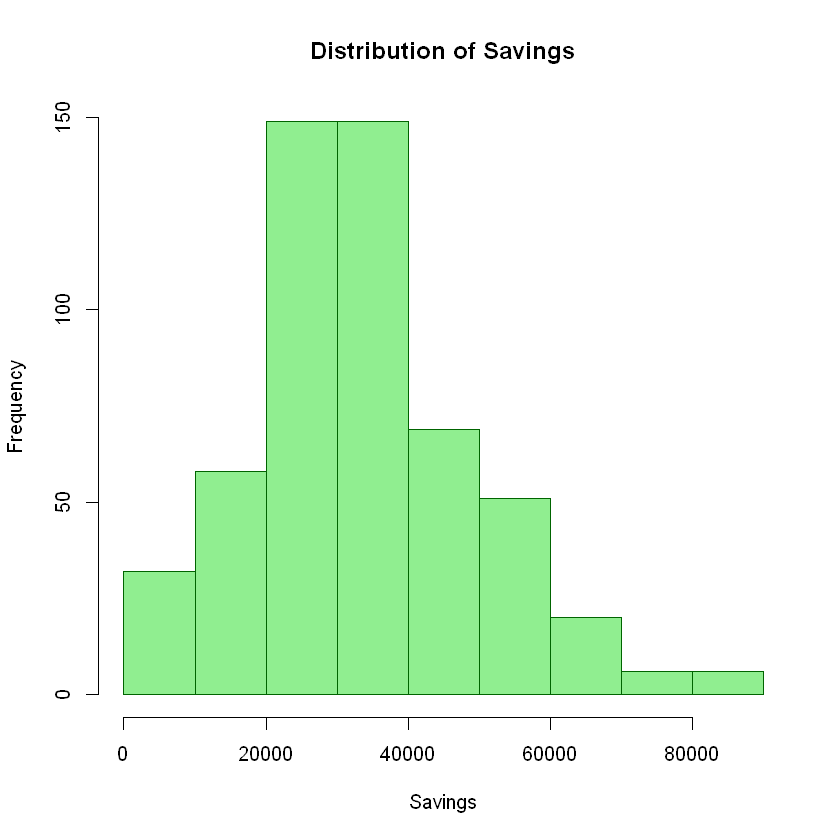

In [4]:

#Display information about the data
summary(mydata)
describe(mydata)
#see the data
head(mydata)
#Plot a scatter plot to see if the defined model roughly can fit the pattern of the data
plot(mydata$income, mydata$savings,
     main = "Savings vs Income",
     xlab = "Income",
     ylab = "Savings",
     col = "steelblue",
     cex = 0.8,
     pch = 16
   )
#Plot a scatter plot to check for clustering
plot(mydata$id, mydata$savings,
     main = "Savings by Individual ID",
     xlab = "Individual ID",
     ylab = "Savings",
     col = "coral",
     pch = 16,
     cex = 0.8
     )
#check for fat tails.
hist(mydata$savings,
     main = "Distribution of Savings",
     xlab = "Savings",
     col = "lightgreen",
     border = "darkgreen")       
#Converts None to the base case by setting it to the last one 
mydata$pet <- factor(mydata$pet, levels = c("Bird", "Cat", "Dog", "Fish", "Reptile", "None")) 
levels(mydata$pet)

d) Test what order of polynomial (linear, quadratic, cubic) is most appropriate to model the effect of income on savings. Justify your answer. [10 marks]

**1)** The Null hypothesis (H₀) is that The coefficients on the quadratic and cubic income terms are jointly equal to zero
The alternative hypothesis (H₁) is that at least one of the quadratic or cubic coefficients is non-zero.

**2)** Define and estimate the models
    - The restricted model constains the linear terms only
    - The unrestricted model contains the linear, quadratic and cubic terms.

**3)** Set the significance level 
    α = 0.05 (the 5 % significance level). The decision rule is to reject H₀ if p < 0.05 else fail to reject H₀.
    
**4)** Compute the F test using pFtest for panel data, ensuring clustered standard errors.

In [5]:
# Restricted Model
reg_r <- plm(savings ~ 0  + pet + household_size + industry + prev_savings + income*family*gender,
        index = c("id", "year"),
        data = mydata,
        model = "within",
        effect = "twoways")
# Cubic with interactions Model 2
reg_ur <- plm(savings ~ 0 + I(income^2) + I(income^3) +industry + pet + household_size + prev_savings  + income*family*gender,
        index = c("id", "year"),
        data = mydata,
        model = "within",
        effect = "twoways")
#Conduct a nested f test to determine whether adding polynomial terms to the linear income model improves the fit. 
#pFtest for panel data      
pFtest(reg_ur, reg_r, vcov. = vcovHC, type = "HC1", cluster = "group") 
#Using Hetroskedacticty robust, clsustered standard errors for panel data.


	F test for twoways effects

data:  savings ~ 0 + I(income^2) + I(income^3) + industry + pet + household_size +  ...
F = 0.78905, df1 = 2, df2 = 425, p-value = 0.4549
alternative hypothesis: significant effects


 **5)Result and interpretation**: 
The test yields F = 0.789 with a p value of 0.4549. As p> 0.05, we fail to reject the null hypothesis that the quadratic and cubic terms jointly equal zero. This means that a linear model is more appropriate for modelling the effect of income on savings. 

This is because there is no statistical evidence at the defined 5% significance level that adding polynomial terms to the linear model improve it.

Furthermore, adding the non-linear terms costs 2 degrees of freedom. Based on the F statistic formula and my result, the numerator is small compared to the denominaoter. 
Where,the numerator is RSS reduction per additional paramater and the denominator is estimated error variance of the unrestricted model. Therefore, the RSS reduction is neglible relative to remaining noise. 











 

**Final Model Based On These Results**

$$Savings_{it} = \alpha_i + \delta_t + \beta_1prev_Savings_{it} + \beta_2 Income_{it} + \beta_3 Family_{it} +  \beta_4 HouseholdSize_{it} + \beta_5 Pet_{it} + \beta_6 Industry{it}+ \beta_7(Income_{it} \times Family_{it} \times Gender_{i})+ \epsilon_{it}$$


**Additional Note** 

After estimating the model and looking at the data, I concluded that industry does change over time and so decided to add it to the model, since it is therefore not perfectly multicolinear with fixed effects.

e) Interpret the coefficients from your final model estimated in part (d). [7 marks]

In [6]:
#Model estimation using robust, clustered standard errors for panel data.
coeftest(reg_r, vcov. = vcovHC, type = "HC1", cluster = "group")



t test of coefficients:

                         Estimate  Std. Error t value  Pr(>|t|)    
petBird                5.4865e+03  3.9133e+03  1.4020  0.161633    
petCat                 9.5514e+03  3.9632e+03  2.4100  0.016375 *  
petDog                 1.8394e+03  1.0929e+03  1.6830  0.093102 .  
petFish                1.7178e+03  1.9217e+03  0.8939  0.371877    
petReptile            -5.4805e+02  2.3020e+03 -0.2381  0.811941    
household_size         4.7332e+02  5.7574e+02  0.8221  0.411471    
industryEducation      4.7933e+02  1.3334e+03  0.3595  0.719412    
industryHealthcare     8.6820e+02  8.2105e+02  1.0574  0.290916    
industryManufacturing  2.1996e+03  1.0552e+03  2.0845  0.037704 *  
industryRetail        -2.4444e+03  1.8857e+03 -1.2963  0.195573    
industryServices       1.5601e+03  1.2307e+03  1.2677  0.205603    
prev_savings          -1.3937e-01  3.0118e-02 -4.6275 4.916e-06 ***
income                 7.3380e-01  2.6724e-01  2.7458  0.006291 ** 
family                

We are only interpreting the statistically significant coefficients 

**Coefficient Interpretation**
- **Pet Ownership (Base case: None)**
    - Cat ownership is statistically significant (p = 0.016 at the 5% level). Those who have a cat, relative to those who have no pets, have savings that are £10,796  higher, ceteris paribus, according to the estimates coefficient.
- **Income** 
    - Income is statistically significant (p = 0.008 at the 1% level). Based on the coefficient estimate, for ever 1 pound increase in income, savings increases by £0.83, ceteris paribus. This indicates very strong savings behaviour amongst the data.
- **Family Status**
    - Family status is statistically significant at the 1% level, p = 0.009. Therefore since this is a binary variable, individuals with a child exhibit a £5807 increase in savings against those without a child based on the estimated coefficient, ceteris paribus. 
- **Previous Savings**
    - Previous Savings is highly significant, since at the 0.1% level, p < 0.001. The coefficient estimate of -0.171 indicates that for every 1 pound increase in previous savings, savings decreases by £0.17, ceteris paribus.
- **Interaction term: Income x Family**
    - This interaction term is statistically signifciant at the 5 % level since p = 0.014. The coefficient estimate of -0.058 indicates that the effect of income on savings depends on family savings. In the case of no child, the increase of 1 pouund in income increases savings by 0.83 according to the estimated savings coefficient, ceteris parabus. For the case where an individual has a child, each additional £1 of income increases savings by £0.77 due to the reduction of £0.06 from the interaction effect, ceteris paribus.




## Question 3 [35 marks]

a) Test for the joint significance of time fixed effects in your model in Q2 e) at the 2% significance level. [10 marks]

**1)** Hypothesis
- The Null hypothesis (H₀) is that all time fixed effects are jointly equal to 0. This means any time specific trends or shocks have no systematic effects on the dependent variable savings. The alternative hypothesis H₁ is that at least 1 time fixed effect is not 0. 

**2)** Model specification
- In order to isolate the effect of time-fixed effects, 2 nested models are defined and compared. 
The restricted model includes entity fixed effects only, the unrestricted model includes both time and entity fixed effects. 

**3)** Significance level
- As defined by the question, α = 0.02 (2% level). The decision rule is reject H₀ if p < 0.02, else fail to reject H₀.

**4)** F test 

Perform the F test using pFtest() with robust, clustered standard errors.




In [7]:
#restricted model with individual entity fixed effects only
reg_rnt <- plm(savings ~ 0  + pet + household_size + prev_savings + income*family*gender,
        index = c("id", "year"),
        data = mydata,
        model = "within",
        effect = "individual")
#unrestricted model 
reg_r <- plm(savings ~ 0  + pet + household_size + prev_savings + income*family*gender,
        index = c("id", "year"),
        data = mydata,
        model = "within",
        effect = "twoways")
# pFtest with clustered, robust standard errors
pFtest(reg_r, reg_rnt, vcov. = vcovHC, type = "HC1", cluster = "group")


	F test for twoways effects

data:  savings ~ 0 + pet + household_size + prev_savings + income *  ...
F = 3.5233, df1 = 5, df2 = 432, p-value = 0.003921
alternative hypothesis: significant effects


**5)** Interpretation/Conclusion

At the significance level of 2%, we reject the null hypothesis. This means that according to the model, the time fixed effects are statistically significant.

The F statistic and result indicate that the reduction in RSS from adding time fixed effects is significant relative to remaining model noise.

We should therefore keep time fixed effects in the model specification as entity and time fixed effects appears to be more appropriate over an entity fixed effects only model. 


b) A government savings incentive program was introduced in 2017 and ended at the beginning of 2020. The incentive paid £500 into savings if a family made personal contributions to their savings account.

Explain what effect you might expect the program to have had on savings behaviour during the period it was in place. [5 marks]

**Explanation**

Relative to 2016, we would expect an increase in savings over the 2017 period, due to government incentive, followed by a decrease after 2020. 
Additionally, based on the assumption that increasing income should increase savings, based on the estimated model, it is likely that over the timeframe the incentive will yield a positive effect on savings.

However these assumptions do not take into account how people would react to having this incentive program over the time frame, or when people find out about, or how they choose to implement the effects of the policy. 

Finally, the program is more likely to have more of an effect for lower income individuals, since higher income individuals as the £500 would represent a smaller overall proportion of their savings.

c) Explain how you would test whether this government savings scheme had an effect on savings behaviour using the dataset provided. The savings incentive was introduced in 2017 and ended at the beginning of 2020. [10 marks]

**Create 2 data subsets.**
- Subset 1 is for year 1 (2016), which is when the data has no effects from the incentive
- Subset 2 is for year 2 (2017), which is when the data has effects from the first year of the incentive.

We then perform a difference regression by doing plm to find out the estimated effect caused by the incentive program on our dependent variable. 
This difference will be represented by the intercept, since the fd model removes time-invariant variables between year 1 and 2. The intercept α then represents the change when all regressors are zero, and considering that the policy change is the only factor that changes for everyone uniformly, the intercept captures its effect. 


d) Perform the test you have described in part (b) and report your findings. [5 marks]

In [8]:
#Create Data subset for years 1 and 2
Savings_sub <- subset(mydata, year == 1 | year == 2)


savings_model <- plm(savings ~ income + family + pet + household_size + 
                            prev_savings + income*family*gender,
                     index = c("id", "year"),
                     data = Savings_sub,
                     model = "fd")

# Get model estimates with robust, clustered standard errors
coeftest(savings_model, vcov. = vcovHC, type = "HC1", cluster = "group")



t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)
(Intercept)           2.9237e+03  2.8565e+03  1.0235   0.3091
income               -2.0369e+00  1.3926e+00 -1.4627   0.1475
family                1.7063e+03  1.4516e+03  1.1755   0.2433
petCat               -4.1173e+02  1.1819e+03 -0.3483   0.7285
household_size       -1.7037e+03  1.5400e+03 -1.1063   0.2719
prev_savings         -1.2280e-01  7.7237e-02 -1.5899   0.1158
income:family        -4.2497e-02  3.8790e-02 -1.0955   0.2766
income:gender         1.9038e+00  2.1680e+00  0.8781   0.3825
family:gender        -1.2231e+04  1.2613e+04 -0.9697   0.3351
income:family:gender  1.6264e-01  1.6744e-01  0.9713   0.3343


**Conclusion**
Since the intercept shows when the policy is in effect, it is clear from the estimated model that savings increases by 2,923.70 pounds, ceteris paribus.
This indicates the government scheme was successful in creating the incentive for people to save.

e) Predict savings in the year 2019 for a 35-year-old male individual with no children, income of £35,000 who works in education.  He has previous savings of £5,000, lives in a household of 2 adults, has a cat. [5 marks]

In [ ]:
#This code is from Code and Coffee

# Predict the level of Savings for a 35 year old man with no children who works in education with income of £35000 
#previous savings of 5000, A cat as a pet, household_size of 2
 # Define the new data
 family <- 0
 gender <- 1 
pet <- 2 
income <- 35000
 prev_savings <- 5000
 household_size <- 2 
 
 # Panel data setup 
year <- 4
id <- 1 
 #Create a data frame for prediction
 pred_data <- data.frame(income, family, gender, pet, household_size, prev_savings, id, year)
 # Format the new data as a pdata.frame 
pred_panel <- pdata.frame(pred_data, index = c("id", "year")) cat("The expected savings value for the man defined", predict(reg_r, newdata = pred_panel), "% \n")
#I Couldnt quite achieve a valid output. 

ERROR: Error in parse(text = input): <text>:17:63: unexpected symbol
16:  # Format the new data as a pdata.frame 
17: pred_panel <- pdata.frame(pred_data, index = c("id", "year")) cat
                                                                  ^


In [ ]:
#This code is from ChatGPT using the prompt: "Help me to write a prediction model based on the criteria of "year 2019 for a 35-year-old male individual with no children, income of £35,000 who works in education.  
#He has previous savings of £5,000, lives in a household of 2 adults, has a cat" that fixes the errors from this predict
#code [inserted the code above]. It uses manual multiplication and addition which seems to fix the error that I found when 
#running and trying to fix the above code.
library(plm)

# 1. Extract Coefficients and Fixed Effects
coeffs   <- coef(reg_r)
ind_eff  <- fixef(reg_r, effect = "individual")
time_eff <- fixef(reg_r, effect = "time")

# 2. Define Inputs

selected_pet     <- "Cat" 

val_income       <- 35000
val_family       <- 0
val_gender       <- 1
val_prev_savings <- 5000
val_hh_size      <- 2
val_id           <- "1"
val_year         <- "2"

# 3. Calculate Linear Prediction
linear_pred <- 0

# Helper function
add_term <- function(name, value) {
  if (name %in% names(coeffs)) return(coeffs[[name]] * value)
  return(0)
}

# --- A. Main numeric variables ---
linear_pred <- linear_pred + add_term("household_size", val_hh_size)
linear_pred <- linear_pred + add_term("prev_savings",   val_prev_savings)
linear_pred <- linear_pred + add_term("income",         val_income)
linear_pred <- linear_pred + add_term("family",         val_family)

# --- B. Pet Variable (Automatic Matching) ---
# This constructs the name (e.g., "petCat") and checks if it exists.
# If the pet is the reference level (e.g., the one left out), it adds 0.
pet_coef_name <- paste0("pet", selected_pet)
linear_pred   <- linear_pred + add_term(pet_coef_name, 1)

# --- C. Interactions ---
linear_pred <- linear_pred + add_term("income:family",        val_income * val_family)
linear_pred <- linear_pred + add_term("income:gender",        val_income * val_gender)
linear_pred <- linear_pred + add_term("family:gender",        val_family * val_gender)
linear_pred <- linear_pred + add_term("income:family:gender", val_income * val_family * val_gender)

# 4. Add Fixed Effects
alpha_i  <- if(val_id   %in% names(ind_eff))  ind_eff[[val_id]]   else 0
lambda_t <- if(val_year %in% names(time_eff)) time_eff[[val_year]] else 0

# 5. Final Result
prediction <- linear_pred + alpha_i + lambda_t

cat("Prediction for the year 2019 for a 35-year-old male individual with no children, income of £35,000 who works in education, has previous savings of £5,000, 
lives in a household of 2 adults, has a cat:", round(prediction, 2), "\n")


Prediction for the year 2019 for a 35-year-old male individual with no children, income of £35,000 who works in education, has previous savings of £5,000, 
lives in a household of 2 adults, has a cat: 51973.47 


**Conclusion** The person outlined in the question has an estimated savings of £51973.

AI References - Used for one main concept, f-test.

**Prompt 1:** Explain how an f test helps us to choose whether or not terms provide a better model fit

F-Test for Model Selection and Fit Comparison
The F-test is a powerful statistical tool that helps determine whether adding additional terms (variables or groups of variables) to a regression model produces a statistically significant improvement in model fit. Rather than evaluating individual coefficients, the F-test assesses multiple coefficients jointly, making it ideal for variable selection decisions.

The Core Principle: Nested Model Comparison
The F-test works by comparing two nested models—a restricted model (with fewer parameters) and an unrestricted model (with additional parameters). The fundamental idea is that while adding more variables will always reduce the residual sum of squares (RSS), not every reduction is meaningful. The F-test determines whether the improvement is statistically significant or merely due to chance.

The two competing hypotheses are:

Null hypothesis (H₀): The restricted model fits the data as well as the unrestricted model. In other words, the additional terms have no predictive value.

Alternative hypothesis (H₁): The unrestricted model provides a significantly better fit than the restricted model.

The F-Test Statistic
The F-statistic is calculated by comparing the reduction in residual sum of squares to the residual sum of squares of the full model, scaled by the degrees of freedom:

F
=
(
R
S
S
r
e
s
t
r
i
c
t
e
d
−
R
S
S
u
n
r
e
s
t
r
i
c
t
e
d
)
/
(
p
u
n
r
e
s
t
r
i
c
t
e
d
−
p
r
e
s
t
r
i
c
t
e
d
)
R
S
S
u
n
r
e
s
t
r
i
c
t
e
d
/
(
n
−
p
u
n
r
e
s
t
r
i
c
t
e
d
−
1
)
F= 
RSS 
unrestricted
 /(n−p 
unrestricted
 −1)
(RSS 
restricted
 −RSS 
unrestricted
 )/(p 
unrestricted
 −p 
restricted
 )
 

Where:

RSS represents the residual sum of squares for each model

p represents the number of parameters in each model

n is the sample size

A larger F-statistic indicates that the additional variables explain substantially more variance than the restricted model.​

Decision Rule: P-value and Significance Level
To decide whether to include the additional terms, you compare the p-value from the F-test to your chosen significance level (typically 0.05 or 0.01):​

If p-value < significance level: Reject the null hypothesis. The additional terms provide a statistically significant improvement in model fit, and you should include them.

If p-value ≥ significance level: Fail to reject the null hypothesis. The additional terms do not significantly improve the fit, and you should prefer the simpler restricted model.

Key Advantages Over Individual Tests
The F-test offers a crucial advantage over t-tests that evaluate individual coefficients: It can assess multiple coefficients simultaneously. This matters because variables might appear individually insignificant yet jointly contribute meaningful predictive power. Conversely, the overall F-test might indicate joint significance while individual t-tests show no individual significance—revealing that the variables work together to explain the variance in ways that aren't apparent from single-coefficient tests.​

Overall F-Test for Model Significance
One specific application is the overall F-test of regression, which compares your full model to an intercept-only model (containing no predictors). If this test is significant, your model predicts the response variable better than simply using the mean of the response.​

Practical Application in Variable Selection
In stepwise selection procedures, the F-ratio guides decisions about whether to add or remove variables. At each step, the algorithm evaluates whether including (or excluding) a variable significantly improves model fit using the F-statistic. This approach balances goodness-of-fit with model parsimony—avoiding unnecessary complexity while ensuring the model captures meaningful relationships in the data.​

**Prompt 2:** explain more of how f test can check if adding extra predictors increases fit relative to model noise.
    OUTPUT: An F-test checks whether the drop in error you get from adding predictors is large compared to the random noise left in the model. In other words, it asks: “Is the extra explained variation big relative to the unexplained variation, once we account for how many predictors were added?”​

Idea: signal vs noise
When extra predictors are added, the residual sum of squares (RSS) always goes down, but that drop may just be random noise. The F-test compares the average reduction in RSS per new parameter (signal) to the average residual variance in the bigger model (noise).​

The F formula in this context
For a reduced model (fewer predictors) and a full model (with extra predictors), the F statistic is

F
=
(
R
S
S
r
e
d
u
c
e
d
−
R
S
S
f
u
l
l
)
/
(
p
f
u
l
l
−
p
r
e
d
u
c
e
d
)
R
S
S
f
u
l
l
/
(
n
−
p
f
u
l
l
)
F= 
RSS 
full
 /(n−p 
full
 )
(RSS 
reduced
 −RSS 
full
 )/(p 
full
 −p 
reduced
 )
 
The numerator is how much error you removed per added predictor; the denominator is the estimated noise level per degree of freedom in the full model.​

How the distribution answers the question
Under the null hypothesis “extra predictors do not improve fit,” that F statistic follows an F distribution with 
(
p
f
u
l
l
−
p
r
e
d
u
c
e
d
,
 
n
−
p
f
u
l
l
)
(p 
full
 −p 
reduced
 ,n−p 
full
 ) degrees of freedom. A large observed F means the extra predictors cut RSS much more than random noise would typically allow, so the p-value is small and you conclude the added predictors materially improve fit.​

Relation to model noise and R²
The denominator 
R
S
S
f
u
l
l
/
(
n
−
p
f
u
l
l
)
RSS 
full
 /(n−p 
full
 ) is the model’s estimate of error variance, so the test is explicitly benchmarked against the noise level. Equivalently, the same logic can be expressed in terms of how much 
R
2
R 
2
  increases when predictors are added, and the F-test checks if that increase is large relative to the noise variance and the number of predictors.​



END OF ASSIGNMENT